In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("train.csv")
print(df.shape)
print(df.head())
print(df.info())

(1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008  

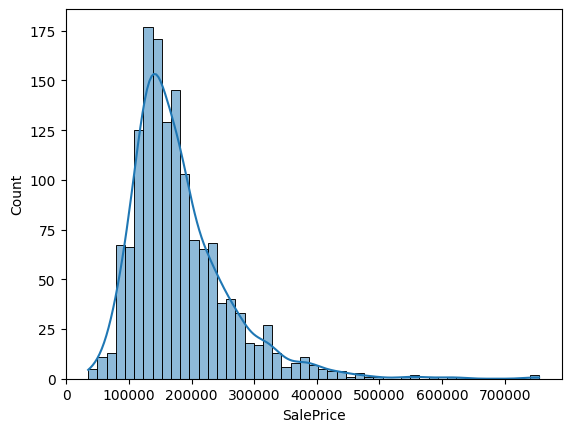

In [20]:
sns.histplot(df['SalePrice'], kde=True)
plt.show()

In [21]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


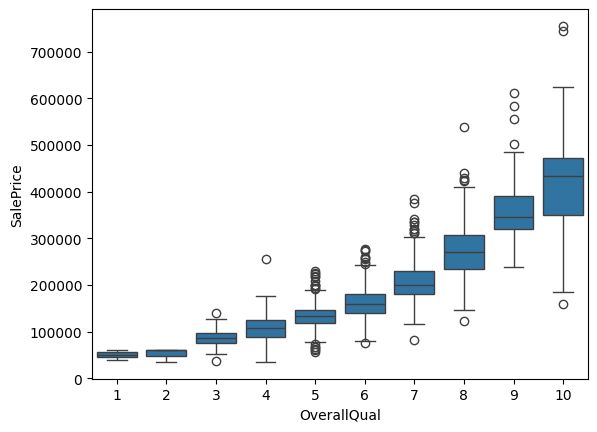

In [22]:
sns.boxplot(x="OverallQual", y="SalePrice", data=df)
plt.show()


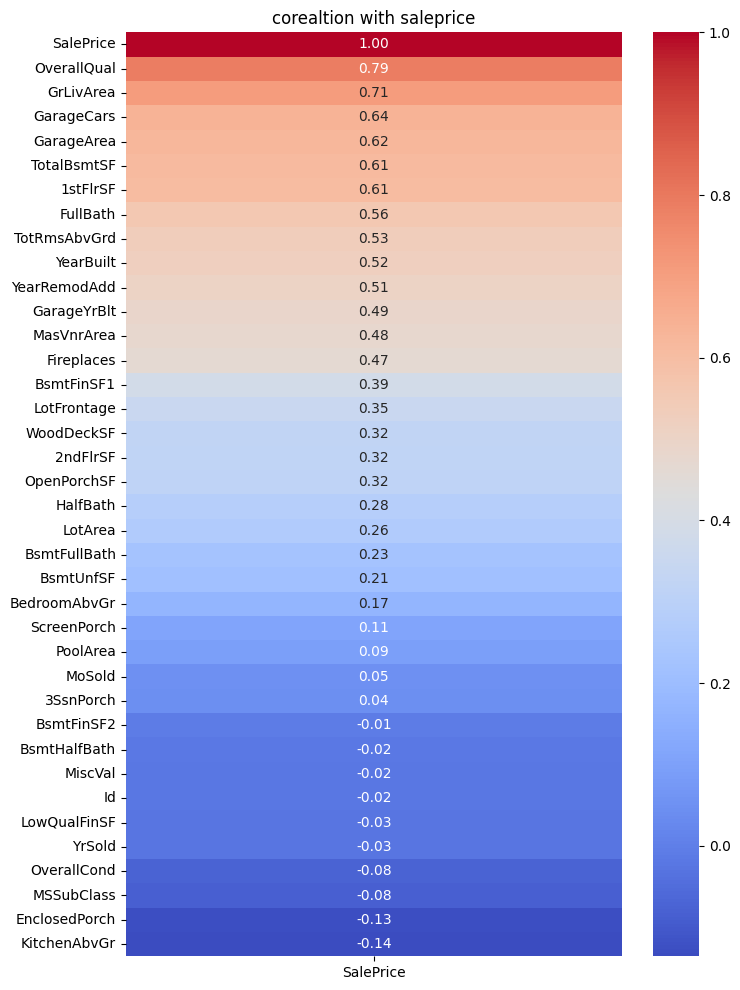

In [23]:

corr = df.corr(numeric_only=True)


corr_target = corr[['SalePrice']].sort_values(by='SalePrice', ascending=False)

plt.figure(figsize=(8,12))
sns.heatmap(corr_target, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("corealtion with saleprice")
plt.show()

In [24]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [25]:
missing_percent = (df.isnull().sum()/len(df))*100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
print(missing_percent)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


In [26]:
drop_cols = missing_percent[missing_percent > 40].index
print(drop_cols)

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'], dtype='object')


In [27]:
df.drop(drop_cols, axis=1, inplace=True)

In [37]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_missing=[col for col in num_cols if df[col].isnull().sum()>0]
for col in num_missing:
    df[col].fillna(df[col].median(), inplace=True)

In [29]:

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_missing = [col for col in num_cols if df[col].isnull().sum() > 0]
for col in num_missing:
    df[col].fillna(df[col].median(), inplace=True)

In [36]:

cat_cols = df.select_dtypes(include=['object']).columns
cat_missing = [col for col in cat_cols if df[col].isnull().sum() > 0]
for col in cat_missing:
    df[col].fillna("None", inplace=True)

In [31]:
print(df.isnull().sum().sum())

0


In [32]:
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']
df['TotalBath'] = df['FullBath'] + (0.5 * df['HalfBath'])
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'] + df['GarageArea']

In [33]:
from sklearn.preprocessing import LabelEncoder
#Label Encoding
cols = ['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual']
for col in cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
#one-hot encoding
df = pd.get_dummies(df, drop_first=True)    

In [34]:
corr = df.corr()['SalePrice'].sort_values(ascending=False)
print(corr.head(20))   
print(corr.tail(20))   


SalePrice               1.000000
TotalSF                 0.809561
OverallQual             0.790982
GrLivArea               0.708624
GarageCars              0.640409
GarageArea              0.623431
TotalBsmtSF             0.613581
1stFlrSF                0.605852
TotalBath               0.597966
FullBath                0.560664
TotRmsAbvGrd            0.533723
YearBuilt               0.522897
YearRemodAdd            0.507101
Foundation_PConc        0.497734
MasVnrArea              0.472614
Fireplaces              0.466929
GarageYrBlt             0.466754
BsmtFinType1_GLQ        0.434597
Neighborhood_NridgHt    0.402149
BsmtFinSF1              0.386420
Name: SalePrice, dtype: float64
Neighborhood_NAmes     -0.188513
Neighborhood_OldTown   -0.192189
RoofStyle_Gable        -0.224744
GarageFinish_None      -0.236832
GarageCond_None        -0.236832
GarageQual_None        -0.236832
GarageType_None        -0.236832
SaleType_WD            -0.242598
BsmtExposure_No        -0.263600
LotShape_Re

In [39]:
from sklearn.model_selection import train_test_split

# X: özellikler, y: hedef (SalePrice)
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

# %80 train - %20 test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train :", X_train.shape)
print("Test :", X_test.shape)


Train : (1168, 234)
Test : (292, 234)


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Initialize Linear Regression model
lin_reg = LinearRegression()
# Train the model on training set
lin_reg.fit(X_train, y_train)
# Predict on test set
y_pred_lr = lin_reg.predict(X_test)
# Calculate metrics
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression R²:", r2_lr)

Linear Regression RMSE: 52576.67895580529
Linear Regression R²: 0.6396102205625032


In [42]:
from sklearn.tree import DecisionTreeRegressor

# Initialize Decision Tree
tree = DecisionTreeRegressor(random_state=42)

# Train the model
tree.fit(X_train, y_train)

# Predict on test set
y_pred_tree = tree.predict(X_test)

# Calculate metrics
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
r2_tree = r2_score(y_test, y_pred_tree)

print("Decision Tree RMSE:", rmse_tree)
print("Decision Tree R²:", r2_tree)


Decision Tree RMSE: 44291.79206735342
Decision Tree R²: 0.7442399721279791


In [44]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest
forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
forest.fit(X_train, y_train)

# Predict on test set
y_pred_forest = forest.predict(X_test)

# Calculate metrics
rmse_forest = np.sqrt(mean_squared_error(y_test, y_pred_forest))
r2_forest = r2_score(y_test, y_pred_forest)

print("Random Forest RMSE:", rmse_forest)
print("Random Forest R²:", r2_forest)

Random Forest RMSE: 30852.592559358072
Random Forest R²: 0.8759006537763884


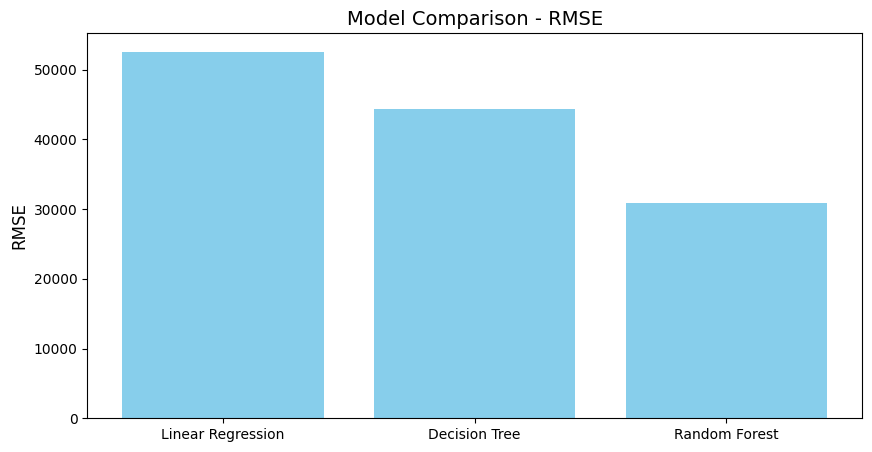

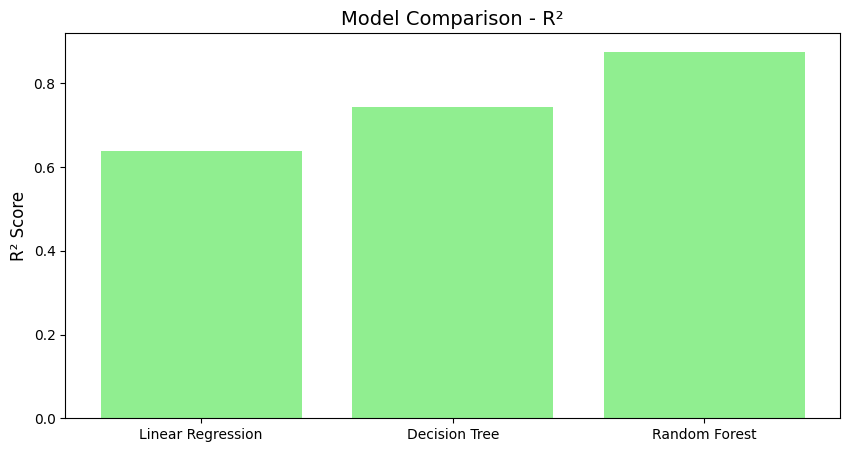

In [45]:
import matplotlib.pyplot as plt

# Store results in a dictionary
results = {
    "Linear Regression": [rmse_lr, r2_lr],
    "Decision Tree": [rmse_tree, r2_tree],
    "Random Forest": [rmse_forest, r2_forest]
}

# Convert results to lists
models = list(results.keys())
rmse_scores = [results[m][0] for m in models]
r2_scores = [results[m][1] for m in models]

# Plot RMSE
plt.figure(figsize=(10,5))
plt.bar(models, rmse_scores, color="skyblue")
plt.title("Model Comparison - RMSE", fontsize=14)
plt.ylabel("RMSE", fontsize=12)
plt.show()

# Plot R²
plt.figure(figsize=(10,5))
plt.bar(models, r2_scores, color="lightgreen")
plt.title("Model Comparison - R²", fontsize=14)
plt.ylabel("R² Score", fontsize=12)
plt.show()


        Feature  Importance
44      TotalSF    0.552310
4   OverallQual    0.224365
17     2ndFlrSF    0.023058
41     HouseAge    0.011966
6     YearBuilt    0.010712
11   BsmtFinSF1    0.009905
3       LotArea    0.009475
19    GrLivArea    0.009455
26  KitchenQual    0.008950
13    BsmtUnfSF    0.008685


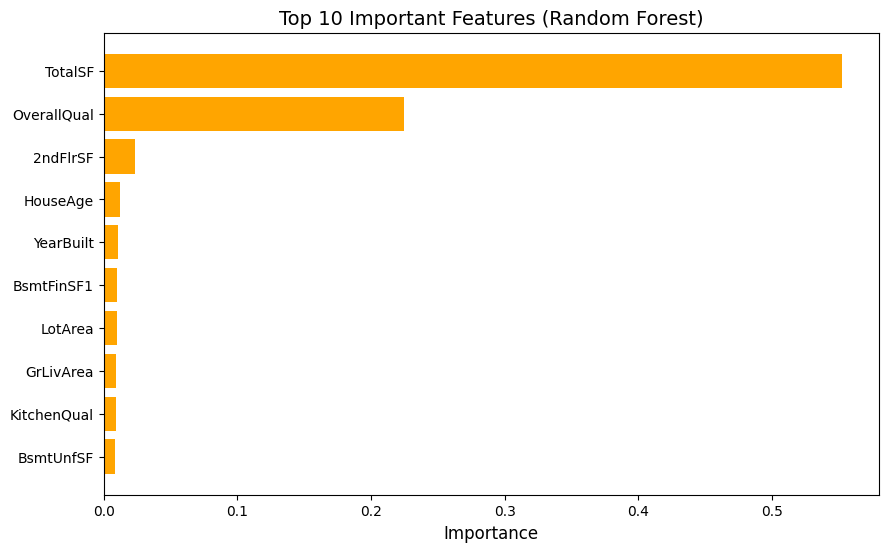

In [46]:
import pandas as pd

# Get feature importances from Random Forest
importances = forest.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Display top 10 features
print(feature_importances.head(10))

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_importances["Feature"][:10], feature_importances["Importance"][:10], color="orange")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.title("Top 10 Important Features (Random Forest)", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.show()


In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Small parameter grid
n_estimators_list = [100, 200]
max_depth_list = [10, 20, None]
min_samples_split_list = [2, 5]

best_rmse = float('inf')
best_params = {}

for n in n_estimators_list:
    for depth in max_depth_list:
        for split in min_samples_split_list:
            rf = RandomForestRegressor(
                n_estimators=n,
                max_depth=depth,
                min_samples_split=split,
                random_state=42,
                n_jobs=-1
            )
            rf.fit(X_train, y_train)
            y_pred = rf.predict(X_test)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            
            if rmse < best_rmse:
                best_rmse = rmse
                best_params = {"n_estimators": n, "max_depth": depth, "min_samples_split": split}

print("Best Parameters:", best_params)
print("Best RMSE:", best_rmse)


Best Parameters: {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 2}
Best RMSE: 30584.04639209407
